#Duke University

Course: AIPI590 (Deep Reinforcement Learning Applications)\
Fall 2022\
Author: *Iqra Imtiaz*



# Final Project: Product recommender for E-commerce

**Dataset**: [Amazon Clothing and Jewelry](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Clothing_Shoes_and_Jewelry_5.json.gz)

**Metric**: NDCG

# Dataset Explanation

**Description**:

This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.

This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

Finally, this data have been reduced to extract the 5-core, such that each of the remaining users and items have 5 reviews each.


**Basic Statistics**:

Number of users:	39,387\
Number of items:	23,033\
Number of transactions:	278,677

**Example**
```
{
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "reviewerName": "J. McDonald",
  "helpful": [2, 3],
  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
  "overall": 5.0,
  "summary": "Heavenly Highway Hymns",
  "unixReviewTime": 1252800000,
  "reviewTime": "09 13, 2009"
}
```
where

- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- helpful - helpfulness rating of the review, e.g. 2/3
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)


More details can be found here: http://jmcauley.ucsd.edu/data/amazon/links.html

#Install

In [ ]:
! pip install pandas trfl
! pip install lightfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports


In [ ]:
import pandas as pd
import os
import numpy as np

from lightfm import LightFM
from lightfm.evaluation import auc_score
from scipy.sparse import coo_matrix
from sklearn import preprocessing
     

# Loading Data

Download the data from link mentioned previously into a Datasets folder in this repository. 

In [ ]:
cd /content/drive/Othercomputers/My-MacBook-Air/590-Final-Project

/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project


In [ ]:
amazon = pd.read_json('Datasets/Amazon/reviews_Clothing_Shoes_and_Jewelry_5.json.gz',compression='gzip',lines=True)
amazon.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [ ]:
print(len(amazon))
print(len(amazon.reviewerID.unique()))
print(len(amazon.asin.unique()))

278677
39387
23033


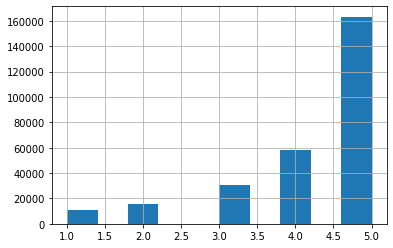

In [ ]:
amazon.overall.hist()

# Modeling

Deep RL model used on amazon dataset is 
[**Self-Supervised Reinforcement Learning for Recommender Systems**](https://arxiv.org/abs/2006.05779).


Download the code from link given and save the following files in kaggle folder into Scripts folder of this repository. 

* NextItNetModules.py
* SA2C.py
* SASRecModules.py
* pop.py
* preprocess.py
* replay_buffer.py
* split_data.py
* utility.py

These files are updated to incorporate data from amazon. For example; sessionId is replaced with reviwerId, item_id is replaced with asin, and is_buy is replaced with overall  (i.e. rating of product). 
Rating is given between 1-5, 1 being lowest. Reward is given when rating is greater than or equal to 4. The threshold is set at 4 because these are the folks who will most likely buy similar items in future compared to those rated below 4.

##Tensorflow Conversion
Since, this code is based on tensorflow version 1, we will update it to use tensorflow version 2.

In [ ]:
#PROJ_DIR = '/content/drive/Othercomputers/My-MacBook-Air/SA2C_Code/Kaggle'
# change current directory after mounting
#%cd $PROJ_DIR
#! ls

In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/SA2C_Code/Kaggle/SA2C.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/SA2C_Code/Kaggle/SA2C.py' \
  --reportfile report.txt

WARNING line 83:29: tf.nn.embedding_lookup requires manual check. `partition_strategy` has been removed from tf.nn.embedding_lookup.  The 'div' strategy will be used by default.
WARNING line 164:36: tf.nn.embedding_lookup requires manual check. `partition_strategy` has been removed from tf.nn.embedding_lookup.  The 'div' strategy will be used by default.
WARNING line 179:26: tf.nn.embedding_lookup requires manual check. `partition_strategy` has been removed from tf.nn.embedding_lookup.  The 'div' strategy will be used by default.
ERROR line 214:27: Using member tf.contrib.layers.fully_connected in deprecated module tf.contrib. tf.contrib.layers.fully_connected cannot be converted automatically. tf.contrib will not be distributed with TensorFlow 2.0, please consider an alternative in non-contrib TensorFlow, a community-maintained repository such as tensorflow/addons, or fork the required code.
ERROR line 217:26: Using member tf.contrib.layers.fully_connected in deprecated module tf.cont

In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/split_data.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/split_data.py' \
  --reportfile report.txt

Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 158, in main
    files_processed, report_text, errors = process_file(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 42, in process_file
    upgrader.process_file(in_filename, out_filename)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/ast_edits.py", line 910, in process_file
    with open(in_filename, "r") as in_file, \
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/split_data.py'


In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/replay_buffer.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/replay_buffer.py' \
  --reportfile report.txt

Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 158, in main
    files_processed, report_text, errors = process_file(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 42, in process_file
    upgrader.process_file(in_filename, out_filename)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/ast_edits.py", line 910, in process_file
    with open(in_filename, "r") as in_file, \
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/replay_buffer.py'


In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/NextItNetModules.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/NextItNetModules.py' \
  --reportfile report.txt

Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 158, in main
    files_processed, report_text, errors = process_file(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 42, in process_file
    upgrader.process_file(in_filename, out_filename)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/ast_edits.py", line 910, in process_file
    with open(in_filename, "r") as in_file, \
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/NextItNetModules.py'


In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/utility.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/utility.py' \
  --reportfile report.txt

Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 158, in main
    files_processed, report_text, errors = process_file(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 42, in process_file
    upgrader.process_file(in_filename, out_filename)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/ast_edits.py", line 910, in process_file
    with open(in_filename, "r") as in_file, \
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/utility.py'


In [ ]:
!tf_upgrade_v2 \
  --infile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/SASRecModules.py' \
  --outfile '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/SASRecModules.py' \
  --reportfile report.txt

Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 158, in main
    files_processed, report_text, errors = process_file(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/tf_upgrade_v2_main.py", line 42, in process_file
    upgrader.process_file(in_filename, out_filename)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/tools/compatibility/ast_edits.py", line 910, in process_file
    with open(in_filename, "r") as in_file, \
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/SASRecModules.py'


## Data Preparation
Run the code below to create following necessary datasets before running the model.

* sorted_amazon.df
* data_ststis.df
* pop_dict.df
* replay_buffer.df
* sampled_train.df
* sampled_val.df



In [ ]:
%run 'Scripts/Amazon/preprocess.py'

<Figure size 432x288 with 0 Axes>

In [ ]:
%run 'Scripts/Amazon/split_data.py'

In [ ]:
!python 'Scripts/Amazon/pop.py' --data='Datasets/Amazon'

0.0
2.0
1.0


In [ ]:
%run 'Scripts/Amazon/replay_buffer.py'

        reviewerID   asin reviewerName helpful  \
30668            0   1883     LarryRun  [0, 0]   
72389            0   4954     LarryRun  [0, 0]   
122588           0   9193     LarryRun  [2, 4]   
135480           0  10286     LarryRun  [0, 0]   
55901            0   3676     LarryRun  [1, 1]   

                                               reviewText  overall  \
30668   These champion mesh are so much better than th...        5   
72389   These wet look leggings were a great buy and f...        5   
122588  I am not sure why other reviews say this is no...        5   
135480  I got so many comments when I wore these pants...        5   
55901   Bought this for my girl for Halloween and it f...        5   

                           summary  unixReviewTime   reviewTime  
30668        Great fit and quality      1370908800  06 11, 2013  
72389    Super fit. Looks amazing!      1350518400  10 18, 2012  
122588   Exactly as pictured! HOT!      1350518400  10 18, 2012  
135480  Awesom

## Running model on rent the Amazon

### Deep RL Model

Self-Supervised Reinforcement Learning for Recommender Systems

NDCG is a measure of ranking quality.

In [ ]:
!python 'Scripts/Amazon/SA2C.py' --model=GRU --data='Datasets/Amazon' --epoch=10

Scripts/Amazon/SA2C.py:88: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  tf.compat.v1.nn.rnn_cell.GRUCell(self.hidden_size),
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2022-12-13 14:31:21.293298: E tensorflow/stream_executor/cu

In [ ]:
!python 'Scripts/Amazon/SA2C.py' --model=SASRec --data='Datasets/Amazon' --epoch=10

Scripts/Amazon/SA2C.py:187: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
2022-12-13 14:46:05.377512: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/Amazon/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/content/drive/Othercomputers/My-MacBook-Air/590-Final-Project/Scripts/Amazon/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/c

In [20]:
!python 'Scripts/Amazon/SA2C.py' --model=Caser --data='Datasets/Amazon' --epoch=10

Scripts/Amazon/SA2C.py:151: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.states_hidden = tf.compat.v1.layers.dropout(self.final,
2022-12-13 15:02:05.673191: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Scripts/Amazon/SA2C.py:215: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.output1 = tf.compat.v1.layers.dense(self.states_hidden, self.item_num,
Scripts/Amazon/SA2C.py:218: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.output2= tf.compat.v1.layers.dense(self.states_hidden, self.item_num,
the loss in 200th batch is: 8.041707
the loss in 400th batch is: 7.598198
the loss in 600th batch is: 7.622176
the loss in 800th batch is: 7.8

In [21]:
!python 'Scripts/Amazon/SA2C.py' --model=NItNet --data='Datasets/Amazon' --epoch=10

Scripts/Amazon/SA2C.py:215: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.output1 = tf.compat.v1.layers.dense(self.states_hidden, self.item_num,
Scripts/Amazon/SA2C.py:218: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  self.output2= tf.compat.v1.layers.dense(self.states_hidden, self.item_num,
2022-12-13 15:19:22.197052: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
the loss in 200th batch is: 9.070894
the loss in 400th batch is: 8.830669
the loss in 600th batch is: 8.380411
the loss in 800th batch is: 8.096857
the loss in 1000th batch is: 7.894581
the loss in 1200th batch is: 7.453938
#############################################################
total clicks: 692, total purchase:3247
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Non-Deep RL Model

LightFM

Metric: AUCScore

In [ ]:
data_directory = 'Datasets/Amazon'
amazon_train = pd.read_pickle(os.path.join(data_directory, 'sampled_train.df'))
amazon_test = pd.read_pickle(os.path.join(data_directory, 'sampled_val.df'))

amazon_train['rating'] = amazon_train.overall >= 4
amazon_test['rating'] = amazon_test.overall >= 4

n = max(max(amazon_train.reviewerID), max(amazon_train.asin)) + 1

rate_matrix = dict()
rate_matrix['train'] = coo_matrix((amazon_train.rating, (amazon_train.reviewerID, amazon_train.asin)), shape=(n,n))
rate_matrix['test'] = coo_matrix((amazon_test.rating, (amazon_test.reviewerID, amazon_test.asin)), shape=(n,n))
rate_matrix

In [23]:

model = LightFM(no_components=10, loss='warp')
model.fit(rate_matrix['train'], epochs=50, num_threads=10)

In [24]:
auc_score(model, rate_matrix['train'], num_threads=10).mean()


0.9942909

In [25]:
auc_score(model, rate_matrix['test'], num_threads=10).mean()


0.9696471